# Project:  Investigating TMDB movies data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We are going to analyze the movies dataset. This data set was collected from The Movies Database TMDB, it contains information about 10,000 movies of which we will try to get some insights on. We also will try to answer the following questions.
- what is the most and least profitable movie?
- what is the relation between the rate of a movie and other parameters such as budget, runtime and profit?
- who is the director who made the most number of movies and what are the rates of those movies?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
movies_df= pd.read_csv('tmdb-movies.csv')
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (Dropping NaN values as well as some unnecessary columns)

In [4]:
movies_df.drop(['imdb_id','homepage','tagline','keywords','overview','release_date','vote_count'], axis=1, inplace=True)
movies_df.dropna(inplace=True)

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   int64  
 3   revenue               9773 non-null   int64  
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   int64  
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  vote_average          9773 non-null   float64
 11  release_year          9773 non-null   int64  
 12  budget_adj            9773 non-null   float64
 13  revenue_adj           9773 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Exploring the profit values)

In [6]:
movies_df['profit']= movies_df['revenue']- movies_df['budget']
movies_df[movies_df['profit']==movies_df['profit'].max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,2544505847


In [7]:
movies_df[movies_df['profit']==movies_df['profit'].min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,6.4,2010,425000000.0,11087569.0,-413912431


### Research Question 1 (Exploring the voting numbers)

In [8]:
movies_df['vote_level']=pd.qcut(movies_df.vote_average, q=4, labels=['Low','Medium','Moderately High','High'])
movies_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit,vote_level
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Moderately High
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,228436354,High


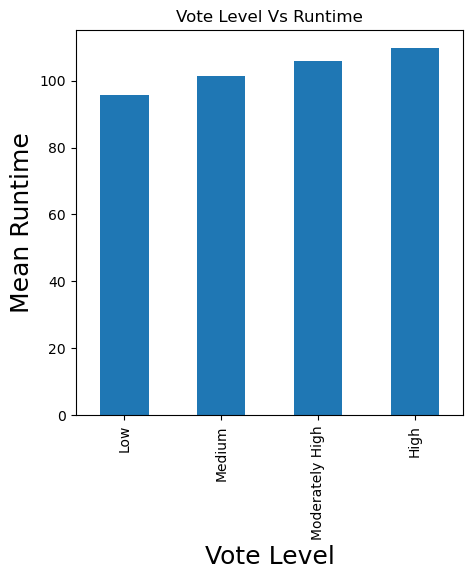

In [9]:
def plt_vote_with(parameter):
    movies_df.groupby('vote_level')[parameter].mean().plot(kind='bar',figsize=(5,5),title='vote level vs {}'.format(parameter).title());
    plt.xlabel('Vote Level',fontsize=18);
    plt.ylabel('Mean {}'.format(parameter).title(),fontsize=18);

plt_vote_with('runtime')

So, here we plotted the vote level vs the mean runtime. It looks like there is a correlation between the runtime of a movie and the rate it will receive. The longer the movie the higher rate it gets.

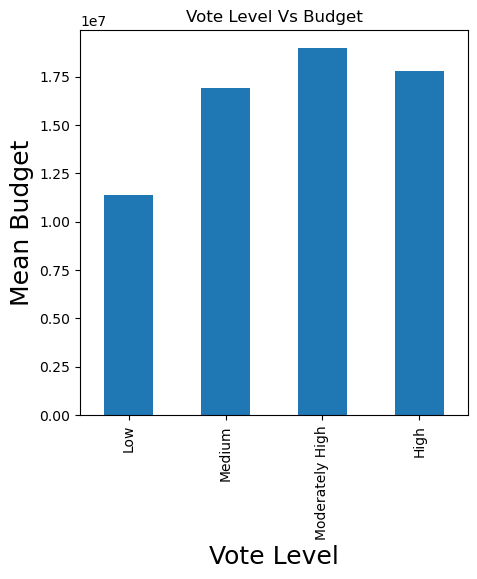

In [19]:
plt_vote_with('budget')

So, here we plotted the vote level vs the budget of the movie. It seems like that high budget movies don't necesserily receive high rate.

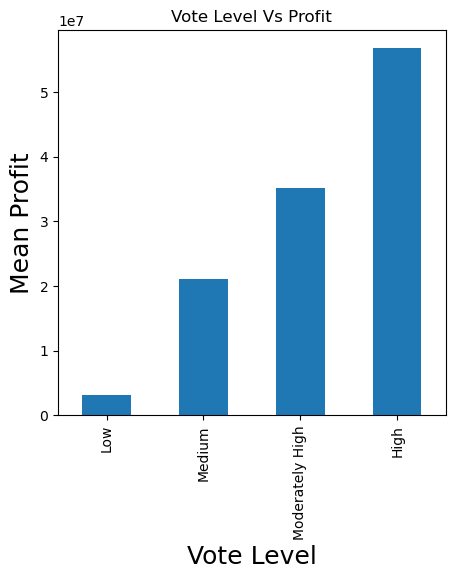

In [20]:
plt_vote_with('profit')

So, here we plotted the vote level vs profit .It looks like the high profitable movies receive high rate, that kinda make sense.

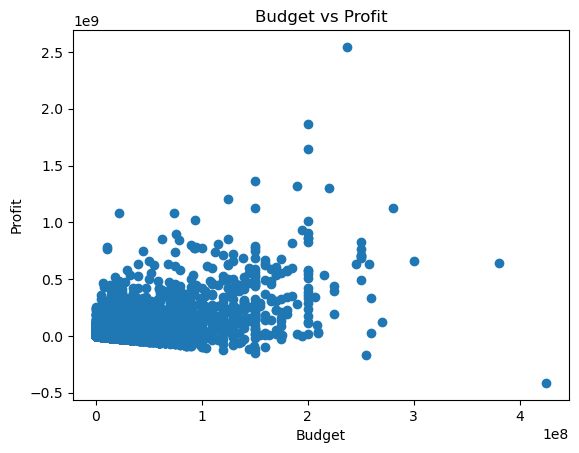

In [13]:
plt.scatter(x = movies_df.budget, y = movies_df.profit)
plt.title('Budget vs Profit');
plt.xlabel('Budget');
plt.ylabel('Profit');

Here we plotted the budget vs profit. it seems like the high budget doen't necesserily mean high profit.

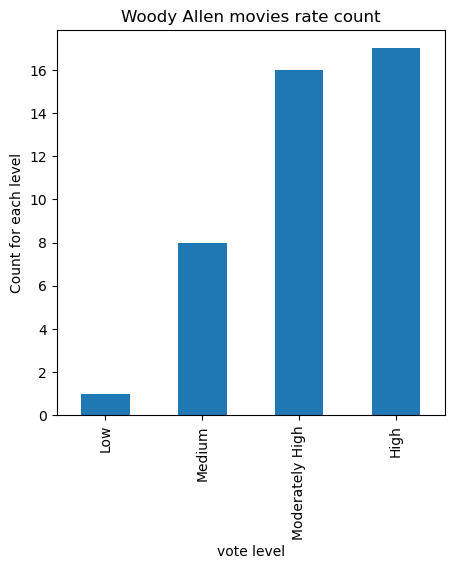

In [14]:
# movies_df['director'].value_counts()
movies_df[movies_df.director=='Woody Allen'].groupby('vote_level')['vote_level'].count().plot(kind='bar',figsize=(5,5));
plt.title('Woody Allen movies rate count');
plt.xlabel('vote level');
plt.ylabel('Count for each level');

Here we plotted the rating vs the count of Woody Allen's movies -as he is the director who made the most movies- and turns out his movies actually receive good rate.

<a id='conclusions'></a>
## Conclusions
- The most profitable movie is Avatar.
- The least profitable movie is The Warrior's Way.
- It looks like there is a correlation between the runtime of a movie and the rate it will receive. The longer the movie the    higher rate it gets.
- It looks like that high budget movies don't necesserily receive high rate.
- It looks like the high profitable movies receive high rate, that kinda make sense.
- Woody Allen is the highest when it comes to the number of movies, and his movies seem to receive pretty good rate.

## Limitations
- There was a couple of limitations in our data, an important one regarding the answer to our questions was that the vote_average column was continous and we needed to discuss which metric or parameter has an effect on it, so we used the the Pandas qcut function to make a categorical column of the vote average values.